In [ ]:
0,
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(n_components=10)

In [ ]:
pca.explained_variance_ratio_

array([9.81658613e-01, 1.64685604e-02, 1.67814812e-03, 1.11597152e-04,
       7.15008792e-05, 6.36570245e-06, 3.78207303e-06, 8.27399099e-07,
       3.40233488e-07, 1.75175059e-07])

<BarContainer object of 10 artists>

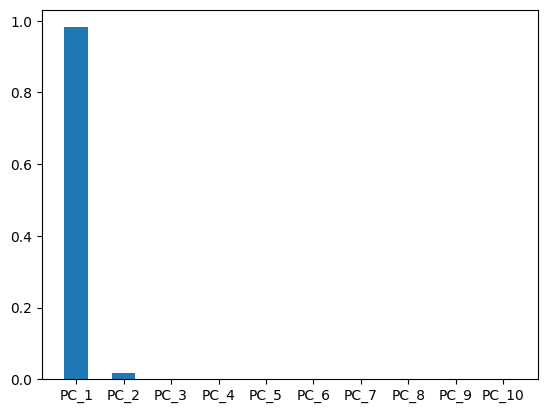

In [ ]:
import matplotlib.pyplot as plt
PCs = ['PC_'+str(i) for i in range(1, 11)]
plt.bar(PCs, pca.explained_variance_ratio_, width = .5)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9440559440559441

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

score = model.score(X_test_pca, y_test)
score

0.8811188811188811

<BarContainer object of 2 artists>

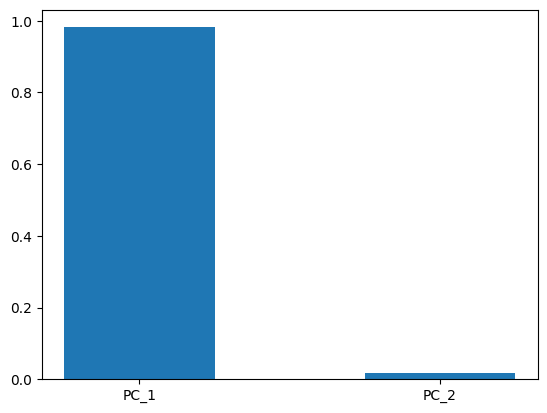

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCs = ['PC_'+str(i) for i in range(1,3)]
plt.bar(PCs, pca.explained_variance_ratio_, width = .5)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9440559440559441

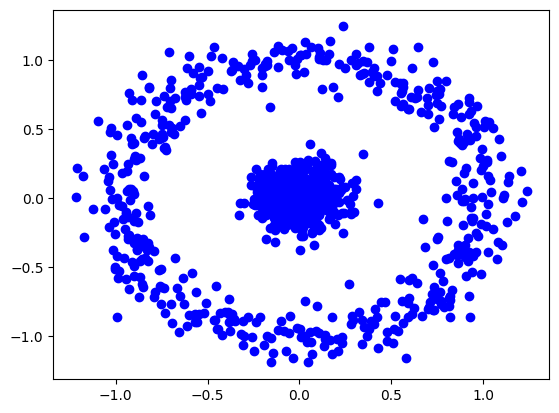

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

plt.plot(features[:, 0], features[:, 1], 'o', c='blue')

In [ ]:
# Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


array([ 0.08961469,  0.17082614, -0.36539792, -0.37995615, -0.37090715,
        0.6078442 , -0.39356042,  0.55552131, -0.39706997, -0.38733386,
       -0.37948734, -0.37769023,  0.25455601, -0.39039716,  0.39742368,
       -0.37364706, -0.3825536 , -0.37354648,  0.30693009, -0.35443587,
        0.26674653, -0.38636934,  0.04754015,  0.29861968, -0.38880508,
       -0.36940646, -0.38214762,  0.48848943,  0.53117546, -0.38704399,
        0.53090804,  0.41694266,  0.58921096, -0.3696242 , -0.36469789,
       -0.40218195, -0.38201905,  0.59934002,  0.42779961,  0.42940318,
        0.10084162,  0.22657993, -0.38500742, -0.37931649, -0.38076893,
        0.60340158,  0.12280673, -0.38757955, -0.37711105,  0.4314274 ,
        0.46054872, -0.36716903,  0.08416134, -0.38134059, -0.3861307 ,
       -0.38427341, -0.14005453,  0.53419069, -0.37436415,  0.20594719,
       -0.38418216, -0.34668156, -0.37892776,  0.32750463,  0.55577819,
        0.60181755, -0.37637002,  0.14812061, -0.03154451, -0.37

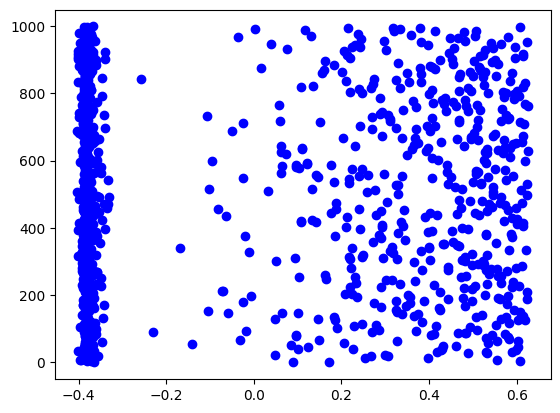

In [ ]:
plt.plot(features_kpca.T[0]), 'o', c='blue')